# SC207 - Text Mining
## Topic Modelling with BERT

[BERTopic Website](https://maartengr.github.io/BERTopic/index.html)

In [1]:
! pip install bertopic

In [1]:
from bertopic import BERTopic
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# May be required if iProgress widget error
# ! pip install ipywidgets widgetsnbextension
# !jupyter nbextension enable --py widgetsnbextension

### Our Dataset

In [3]:
news_df = pd.read_csv('tokens.csv')

In [4]:
news_df.head()

,query,title,text,published,site,tokens
0,Hong Kong,Horrifying view of fires from space,Video Image Satellite images show insane view ...,2019-11-08T23:51:00.000+02:00,news.com.au,video image satellite image insane view nsw fi...
1,Hong Kong,Protester shot with live round in Hong Kong as...,\n Chief Executive addresses the press after c...,2019-11-11T02:00:00.000+02:00,scmp.com,chief_executive address press citywide chaos t...
2,Hong Kong,China imposes online gaming curfew for minors ...,Hong Kong (CNN) China has announced a curfew o...,2019-11-06T02:00:00.000+02:00,cnn.com,hong_kong cnn china announce curfew online gam...
3,Hong Kong,Trump made 96 false claims last week - CNNPoli...,Washington (CNN) President Donald Trump was re...,2019-10-30T20:35:00.000+02:00,cnn.com,washington cnn president_donald trump relentle...
4,Hong Kong,50 best breads around the world | CNN Travel,(CNN) — What is bread? You likely don't have t...,2019-10-16T07:02:00.000+03:00,cnn.com,cnn bread likely think long hungry slice sourd...


In [5]:
raw_corpus = news_df['text'].tolist()
raw_corpus[0:2]

["Video Image Satellite images show insane view of NSW fires from space Satellite images show the huge amount of smoke billowing from a number of bushfires across NSW.\nThe NSW fires, as seen from space. Source:Twitter\nStartling satellite images show the fires currently ravaging Australia’s east coast are clearly visible from space, with smoke billowing hundreds of kilometres across the Pacific Ocean.\nAs of 7pm on Saturday, three people are dead, five are missing, 30 people are injured and more than 150 homes have been destroyed by the wild fires razing Australia’s drought-stricken east coast.\nTimelapse imagery shared by meteorologist and scientist Dakota Smith on Twitter shows the path of the fires growing, and smoke pouring out across the ocean:\nExplosive wildfire growth with giant smoke plumes.\nInsane imagery of Australia's east coast today. pic.twitter.com/yFTuEQkOYv\n— Dakota Smith (@weatherdak) November 8, 2019 Here’s another view of the fires’ progression yesterday, tweeted

In [6]:
tokenized_corpus = news_df['tokens'].tolist()
tokenized_corpus[0:2]

['video image satellite image insane view nsw fire space satellite image huge smoke billow number bushfire nsw nsw fire space source twitter startling satellite image fire currently ravage australia east coast clearly visible space smoke billow kilometre pacific ocean pm saturday people dead miss people injure more_than home destroy wild fire raze australia drought stricken east coast timelapse imagery share meteorologist scientist dakota smith twitter path fire grow smoke pour ocean explosive wildfire growth giant smoke plume insane imagery australia east coast today dakota smith november view fire progression yesterday tweet deputy commissioner executive director operations nsw rural fire service progression major fire today nsw nswfires rob rogers november nasa worldview online tool fire grow past_few day view november fire november source supply november fire november source supply recent imagery available november fire november source supply wide view australian government burea m

### Basic BERTopic

BERTopic analysis can be broken down into two parts.

1. Embeddings
2. Topic Representation

#### 1. Embeddings
BERTopic uses a pre-trained model (similar to spacy's language models) to determine the similarity of different documents within a corpus. The BERT model is able to factor in word ordering as well as the semantic similarity
of words into its predictions, as well as better anticipate which words within a document are the most important to conveying the sentence's meaning. In essence it looks at words within their context and makes a prediction about the which documents are similar and which are dissimilar. It expresses that using a large array of numbers called 'embeddings'. In many ways embeddings are similar to our vectors when we counted the frequency of words.


> 1. I am a pet dog
> 2. I am a pet cat
> 3. Architecture is a serious discipline


| **Document** | I | am | a | pet | dog | cat | architecture | is | serious | discipline |
|--------------|---|----|---|-----|-----|-----|--------------|----|---------|------------|
| 1            | 1 | 1  | 1 | 1   | 1   | 0   | 0            | 0  | 0       | 0          |
| 2            | 1 | 1  | 1 | 1   | 0   | 1   | 0            | 0  | 0       | 0          |
| 3            | 0 | 0  | 1 | 0   |     |     | 1            | 1  | 1       | 1          |

BERT embeddings represent each document as a row of 384 columns. This data can be used by our computational tools to find clusters of documents based on their semantic similarity, identify which documents are representative of a particular cluster etc. It is a powerful approach to topic modelling as it is aware of more than just the words used, but how they are used and the context of their usage. As such BERT embeddings are best produced using completely raw text, without any pre-processing.

#### 2. Topic Representation
Seperately, BERTopic uses a variation of TFIDF to then generate keywords to represent clusters of documents found via the embeddings. By default it uses a fairly basic vectorisation and pre-processing routine. However it is also possible to pass it pre-prepared tokens (like we produced in earlier sessions) which it will happily use instead. As the embeddings are generated using the raw text, whilst our keywords are produced using pre-processed text, this means our pre-processing decisions won't impact the embeddings and actual clustering, just the quality of the words used to describe the clusters.



### Basic BERTopic - default settings, no custom pre-processing

In [34]:
topic_model = BERTopic(calculate_probabilities=True)
topics, probabilities = topic_model.fit_transform(raw_corpus)

In [35]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,25,-1_the_to_and_of
1,0,44,0_the_to_of_and
2,1,28,1_the_to_and_of
3,2,23,2_the_to_of_in
4,3,21,3_the_tesla_to_in
5,4,18,4_hong_kong_of_the
6,5,16,5_the_to_of_and


Here are our topics. It has discovered 7 topics (plus a noise topic labelled -1). Not great topics in terms of representation.

In [36]:
topic_model.visualize_barchart(n_words=10)

Remember the seperation in the model. The embeddings which determine the topics, and then the topic representation. We can update our topic model's topic representation side without impacting the embedding side.

In [37]:
topic_model.update_topics(docs=tokenized_corpus, topics=topics)

In [38]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,25,-1_bread_california_use_business
1,0,44,0_facebook_zuckerberg_company_libra
2,1,28,1_trump_president_miller_claim
3,2,23,2_brexit_eu_uk_vote
4,3,21,3_tesla_car_uber_company
5,4,18,4_hidecaption_kongunrest_photohong_protester
6,5,16,5_use_email_scam_child


In [39]:
topic_model.visualize_barchart()

Looking better. The number and distribution of the topics is still broadly the same, but now the topic descriptions are improved. Let's work with this.

#### Assessing our Topic Model

To some extent we already know generally what topics should be in our data as we know the queries that generated the documents.

In [13]:
news_df['query'].unique()

array(['Hong Kong', 'Tesla', 'alt-right', 'billionaire', 'bitcoin',
       'brexit', 'cryptocurrency'], dtype=object)

In [14]:
news_df['topic'] = topics

In [17]:
query_topic_crosstab = pd.crosstab(index=news_df['query'], columns=news_df['topic'])
query_topic_crosstab

topic,-1,0,1,2,3,4,5
query,,,,,,,
Hong Kong,5,0,2,1,1,15,1
Tesla,3,2,0,0,20,0,0
alt-right,4,5,14,1,0,0,1
billionaire,3,10,10,2,0,0,0
bitcoin,2,9,1,0,0,0,13
brexit,4,0,0,18,1,2,0
cryptocurrency,3,20,0,1,0,0,1


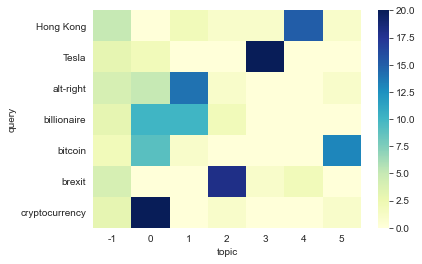

In [18]:
sns.heatmap(query_topic_crosstab, cmap='YlGnBu')
plt.show()

We can see that generally the topics conform to our queries. This is a good sign indicating that out embeddings were able to accurately determine similarity. We can even see some crossover on particular queries.

We won't always have existing classifications like this, but this helps give us confidence that if we did the same procedure on a set of documents in which we had no sense of the topics, it would be able to surface them for us.

In [16]:
topic_model.generate_topic_labels()

['-1_bread_california_fire',
 '0_facebook_zuckerberg_company',
 '1_trump_president_miller',
 '2_brexit_eu_uk',
 '3_tesla_car_uber',
 '4_hidecaption_photohong_kongunrest',
 '5_use_email_scam']

We can see the similarity of topics using the built in visualiser.

In [19]:
topic_model.visualize_topics()

The plot above shows us the distance between topics, with the size of the circle indicating the relative size of the topic in the corpus. Topics that are closer together are considered similar. We can see a more detailed version by visualizing the document embeddings in two dimensons.
The first argument specifies how to label the points, rather than relying on the text itself if we provide the embeddings.

In [20]:
embeddings = topic_model._extract_embeddings(raw_corpus)

In [21]:
topic_model.visualize_documents(news_df['title'], embeddings=embeddings)

In [22]:
topic_model.visualize_hierarchy()

In [23]:
hierarchical_topics = topic_model.hierarchical_topics(raw_corpus, topics)

100%|██████████| 5/5 [00:00<00:00, 77.76it/s]


In [25]:
print(topic_model.get_topic_tree(hierarchical_topics))

.
├─■──hidecaption_photohong_kongunrest_protester_hongkong ── Topic: 4
└─trump_people_new_president_news
     ├─■──use_email_scam_edgar_user ── Topic: 5
     └─trump_president_people_new_trumps
          ├─trump_president_people_october_trumps
          │    ├─■──brexit_eu_uk_vote_parliament ── Topic: 2
          │    └─trump_president_trumps_october_white
          │         ├─■──trump_president_miller_claim_whistleblower ── Topic: 1
          │         └─■──facebook_zuckerberg_company_libra_google ── Topic: 0
          └─■──tesla_car_uber_company_ford ── Topic: 3



In [27]:
topic_model.visualize_heatmap()

In [28]:
topic_model.visualize_term_rank()

In [29]:
topics_over_time = topic_model.topics_over_time(tokenized_corpus,topics,news_df['published'].tolist())

In [30]:
topic_model.visualize_topics_over_time(topics_over_time)

In [31]:
topics_per_class = topic_model.topics_per_class(tokenized_corpus,topics, classes=news_df['query'].tolist())
topic_model.visualize_topics_per_class(topics_per_class)

In [45]:
topic_model.visualize_distribution(probabilities[2])

In [46]:
news_df.loc[2,'title']

'China imposes online gaming curfew for minors in bid to fight addiction - CNN'

In [66]:
topic_model.get_representative_docs()[5][2]

" Also in this package Fraud victims of Aziz Com Mirza speak out The dodgy investment schemes of Canadian-Pakistani Aziz Com Mirza ‘Serial’ entrepreneur in Dubai accused of being serial scammer Dubai officials warn about new online extortion scam 'Dead' man comes back to life to scam in Ajman Dubai: A Dubai-based expat accused of defrauding investors worldwide through a string of get-rich-quick schemes seems to have run out of luck.\nCanadian man Aziz ‘Com’ Mirza, who lives in Burj Khalifa, drives supercars and describes himself as serial entrepreneur, mentor, influencer and philanthropist has been arrested and is now in Al Awir jail, Gulf News can confim.\nCom, who is of Pakistani origin, was reportedly taken into custody by Bur Dubai Police on October 27 following a complaint of a UAE resident who lost over $150,000 in his dodgy schemes. A source at Dubai Public Prosecution said Mirza is being investigated for fraud and taking money from people illegally.\nGulf News uncovered the rac

In [62]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,25,-1_bread_california_use_business
1,0,44,0_facebook_zuckerberg_company_libra
2,1,28,1_trump_president_miller_claim
3,2,23,2_brexit_eu_uk_vote
4,3,21,3_tesla_car_uber_company
5,4,18,4_hidecaption_kongunrest_photohong_protester
6,5,16,5_use_email_scam_child


In [70]:
class_topic_model = BERTopic()
class_topics, class_probabilities = class_topic_model.fit_transform(documents=raw_corpus, y=cats)

In [69]:
cats, labels = pd.factorize(news_df['query'])
cats

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [71]:
class_topic_model.get_topic_info()

,Topic,Count,Name
0,0,26,0_the_to_and_in
1,1,25,1_the_of_in_and
2,2,25,2_the_to_of_and
3,3,25,3_the_to_and_of
4,4,25,4_the_to_in_and
5,5,25,5_the_to_and_of
6,6,24,6_the_to_of_and


In [72]:
class_topic_model.update_topics(docs=tokenized_corpus, topics=class_topics)

In [73]:
class_topic_model.get_topic_info()

,Topic,Count,Name
0,0,26,0_tesla_california_car_company
1,1,25,1_hongkong_hidecaption_kongunrest_photohong
2,2,25,2_facebook_zuckerberg_google_company
3,3,25,3_miller_website_trump_wordpress
4,4,25,4_brexit_eu_uk_people
5,5,25,5_trump_billionaire_president_like
6,6,24,6_use_bitcoin_email_scam


In [74]:
news_df['class_topic'] = class_topics

query_topic_crosstab = pd.crosstab(index=news_df['query'], columns=news_df['class_topic'])
query_topic_crosstab

class_topic,0,1,2,3,4,5,6
query,,,,,,,
Hong Kong,0,25,0,0,0,0,0
Tesla,25,0,0,0,0,0,0
alt-right,0,0,0,25,0,0,0
billionaire,0,0,0,0,0,25,0
bitcoin,1,0,0,0,0,0,24
brexit,0,0,0,0,25,0,0
cryptocurrency,0,0,25,0,0,0,0


<AxesSubplot:xlabel='class_topic', ylabel='query'>

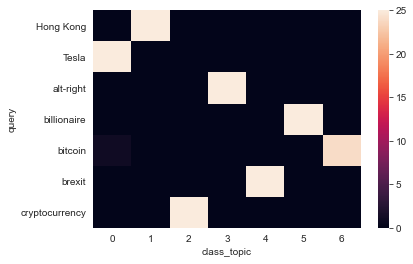

In [75]:
sns.heatmap(query_topic_crosstab)

# Tweet Model

In [77]:
import numpy as np
tweet_model = BERTopic.load('tweet_topic_model')
tweet_embeddings = np.load('large_brexit_tweets_embeddings.npy')

tweets = pd.read_pickle('large_brexit_tweets_with_tokens.pkl')

In [79]:
tweet_model.get_topic_info()

,Topic,Count,Name
0,-1,19610,-1_tory_seat_bad_good
1,0,4390,0_celebrateyour_caresay_yearanniversary_togeth...
2,1,1740,1_plea_wouldwin_leaveorremain_secondreferendum
3,2,1582,2_octcoin_windfallfromeuropean_inve_hundredoft...
4,3,1235,3_giantus_patientwill_fairgame_meanthenhs
...,...,...,...
1580,1579,10,1579_lager_pint_luckily_contribution
1581,1580,10,1580_mep_meps_euro_underestimate
1582,1581,10,1581_monbrexi_presumablywhy_aboutfiscal_respon...
1583,1582,10,1582_split_reality_barcelona_godforbid


In [82]:
tweet_model.visualize_topics(top_n_topics=20)

In [87]:
topic_model.transform(tweets['full_text'].tolist())

KeyboardInterrupt: 

In [ ]:
topic_model.reduce_topics(tweets['tokens'], topics)